In [32]:
!pip install alpha_vantage
!pip install plotly

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [33]:
%matplotlib inline
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import plotly as plotly
import numpy as np
import pprint as pprint

In [34]:
# Your key here
key = 'RY4QOCLLB7ZIVZ8M'
# Chose your output format, or default to JSON (python dict)
ts = TimeSeries(key, output_format='pandas')
ti = TechIndicators(key)

In [35]:
# Get the data, returns a tuple
# aapl_data is a pandas dataframe, aapl_meta_data is a dict
#aapl_data, aapl_meta_data = ts.get_daily(symbol='AAPL')
# aapl_sma is a dict, aapl_meta_sma also a dict
#aapl_sma, aapl_meta_sma = ti.get_sma(symbol='AAPL')

#AMD
amd_data, amd_meta_data = ts.get_daily(symbol='AMD')
#LRCX
lrcx_data, lrcx_meta_data = ts.get_daily(symbol='LRCX')
#WELL
well_data, well_meta_data = ts.get_daily(symbol='WELL')
#VNO
vno_data, vno_meta_data = ts.get_daily(symbol='VNO')

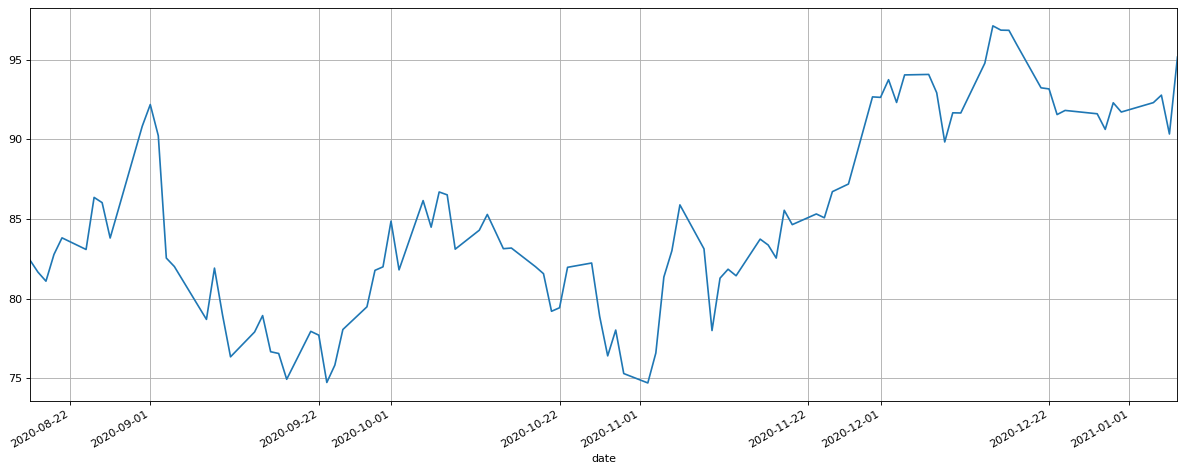

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-01-07,91.33,95.5100,91.200,95.16,42897157.0
2021-01-06,91.62,92.2800,89.460,90.33,51911657.0
2021-01-05,92.10,93.2077,91.410,92.77,34207989.0
2021-01-04,92.11,96.0600,90.915,92.30,51802552.0
2020-12-31,92.10,92.3000,90.870,91.71,24930684.0


In [36]:
# Visualization
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
amd_data['4. close'].plot()
plt.tight_layout()
plt.grid()
plt.show()

#pprint(amd_data.head(5))
amd_data.head(5)

In [37]:
#get last 5 close of day returns for each stock
w = well_data['4. close'].head(5).to_numpy()
x = amd_data['4. close'].head(5).to_numpy()
y = lrcx_data['4. close'].head(5).to_numpy()
z = vno_data['4. close'].head(5).to_numpy()

print("WELL:", w)
print("AMD:", x)
print("LRCX:", y)
print("VNO:", z)

WELL: [63.3  64.58 61.96 61.6  64.62]
AMD: [95.16 90.33 92.77 92.3  91.71]
LRCX: [514.46 496.49 494.55 478.02 472.27]
VNO: [35.83 36.77 35.64 36.66 37.34]


In [38]:
#find covariance
#WELL and AMD
cov1 = np.cov(w,x)
print("\n WELL and AMD \n", cov1)

#WELL and LRCX
cov2 = np.cov(w,y)
print("\n WELL and LRCX \n", cov2)

#WELL and VNO
cov3 = np.cov(w,z)
print("\n WELL and VNO \n", cov3)

#AMD and LRCX
cov4 = np.cov(x,y)
print("\n LRCX and AMD \n", cov4)

#AMD and VNO
cov5 = np.cov(x,z)
print("\n VNO and AMD \n", cov5)

#LRCX and VNO
cov6 = np.cov(y,z)
print("\n LRCX and VNO \n", cov6)


 WELL and AMD 
 [[ 2.00692 -0.96561]
 [-0.96561  3.12773]]

 WELL and LRCX 
 [[ 2.0069200e+00 -7.9470000e-02]
 [-7.9470000e-02  2.7807067e+02]]

 WELL and VNO 
 [[2.00692 0.57798]
 [0.57798 0.49477]]

 LRCX and AMD 
 [[  3.12773  17.21946]
 [ 17.21946 278.07067]]

 VNO and AMD 
 [[ 3.12773  -0.826965]
 [-0.826965  0.49477 ]]

 LRCX and VNO 
 [[278.07067   -8.764455]
 [ -8.764455   0.49477 ]]


In [39]:
#find precision matrix
#WELL and AMD
inv1 = np.linalg.inv(cov1)
print("\n WELL and AMD \n", inv1)

#WELL and LRCX
inv2 = np.linalg.inv(cov2)
print("\n WELL and LRCX \n", inv2)

#WELL and VNO
inv3 = np.linalg.inv(cov3)
print("\n WELL and VNO \n", inv3)

#AMD and LRCX
inv4 = np.linalg.inv(cov4)
print("\n LRCX and AMD \n", inv4)

#AMD and VNO
inv5 = np.linalg.inv(cov5)
print("\n VNO and AMD \n", inv5)

#LRCX and VNO
inv6 = np.linalg.inv(cov6)
print("\n LRCX and VNO \n", inv6)


 WELL and AMD 
 [[0.58520203 0.18066679]
 [0.18066679 0.37549714]]

 WELL and LRCX 
 [[4.98281604e-01 1.42404228e-04]
 [1.42404228e-04 3.59624881e-03]]

 WELL and VNO 
 [[ 0.75089968 -0.87718536]
 [-0.87718536  3.04585078]]

 LRCX and AMD 
 [[ 0.48510273 -0.03003987]
 [-0.03003987  0.00545642]]

 VNO and AMD 
 [[0.57289191 0.95753898]
 [0.95753898 3.62158421]]

 LRCX and VNO 
 [[0.0081423  0.14423441]
 [0.14423441 4.57613841]]


/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


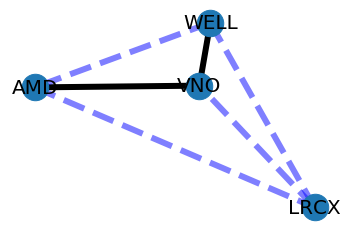

In [40]:
#create graph of stocks
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge('WELL', 'AMD', weight=0.18)
G.add_edge('WELL', 'LRCX', weight= 0.00014)
G.add_edge('WELL', 'VNO', weight=0.88)
G.add_edge('LRCX', 'AMD', weight=0.03)
G.add_edge('VNO', 'AMD', weight=0.96)
G.add_edge('VNO', 'LRCX', weight=0.14)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

In [41]:
#include penalty loss function
tuning = 0.8
for (u, v, d) in G.edges(data=True):
    print(d.get('weight'))
    weight = d.get('weight')
    weight = weight - (tuning*weight)
    print("New weight", weight)

0.18
New weight 0.036000000000000004
0.00014
New weight 2.799999999999999e-05
0.88
New weight 0.17599999999999993
0.03
New weight 0.005999999999999998
0.96
New weight 0.19199999999999995
0.14
New weight 0.027999999999999997


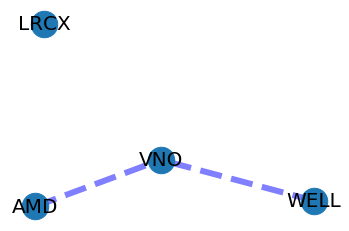

In [42]:
#replot graph
G1 = nx.Graph()

G1.add_edge('WELL', 'AMD', weight=0.036)
G1.add_edge('WELL', 'LRCX', weight=0.000028)
G1.add_edge('WELL', 'VNO', weight=0.176)
G1.add_edge('LRCX', 'AMD', weight=0.006)
G1.add_edge('VNO', 'AMD', weight=0.19)
G1.add_edge('VNO', 'LRCX', weight=0.027)

elarge = [(u, v) for (u, v, d) in G1.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G1.edges(data=True) if d['weight'] >= 0.1]
#esmall = [(u, v) for (u, v, d) in G1.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G1)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G1, pos, node_size=700)

# edges
nx.draw_networkx_edges(G1, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G1, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G1, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

In [43]:
import sklearn as sklearn
from sklearn.covariance import GraphicalLasso

alpha = 0.2

#Using LASSO regularization
#Returns covariance matrix and precision matrix

# WELL and AMD
reg_1 = sklearn.covariance.graphical_lasso(cov1, alpha, cov_init=None, 
                                   mode='cd', tol=0.0001, enet_tol=0.0001, 
                                   max_iter=100, verbose=False, return_costs=False, 
                                   eps=2.220446049250313e-16, return_n_iter=False)

print("\n WELL and AMD \n", reg_1[1]) #precision matrix only

# WELL and LRCX
reg_2 = sklearn.covariance.graphical_lasso(cov2, alpha, cov_init=None, 
                                   mode='cd', tol=0.0001, enet_tol=0.0001, 
                                   max_iter=100, verbose=False, return_costs=False, 
                                   eps=2.220446049250313e-16, return_n_iter=False)
print("\n WELL and LRCX \n", reg_2[1])

# WELL and VNO
reg_3 = sklearn.covariance.graphical_lasso(cov3, alpha, cov_init=None, 
                                   mode='cd', tol=0.0001, enet_tol=0.0001, 
                                   max_iter=100, verbose=False, return_costs=False, 
                                   eps=2.220446049250313e-16, return_n_iter=False)
print("\n WELL and VNO \n", reg_3[1])

# LRCX and AMD
reg_4 = sklearn.covariance.graphical_lasso(cov4, alpha, cov_init=None, 
                                   mode='cd', tol=0.0001, enet_tol=0.0001, 
                                   max_iter=100, verbose=False, return_costs=False, 
                                   eps=2.220446049250313e-16, return_n_iter=False)
print("\n LRCX and AMD \n", reg_4[1])

# VNO and AMD
reg_5 = sklearn.covariance.graphical_lasso(cov5, alpha, cov_init=None, 
                                   mode='cd', tol=0.0001, enet_tol=0.0001, 
                                   max_iter=100, verbose=False, return_costs=False, 
                                   eps=2.220446049250313e-16, return_n_iter=False)
print("\n VNO and AMD \n", reg_5[1])

# LRCX and VNO
reg_6 = sklearn.covariance.graphical_lasso(cov6, alpha, cov_init=None, 
                                   mode='cd', tol=0.0001, enet_tol=0.0001, 
                                   max_iter=100, verbose=False, return_costs=False, 
                                   eps=2.220446049250313e-16, return_n_iter=False)
print("\n LRCX and VNO \n", reg_6[1])


 WELL and AMD 
 [[0.54959763 0.13453125]
 [0.13453125 0.35265144]]

 WELL and LRCX 
 [[0.49827597 0.        ]
 [0.         0.00359621]]

 WELL and VNO 
 [[ 0.58201735 -0.4446327 ]
 [-0.4446327   2.3608187 ]]

 LRCX and AMD 
 [[ 0.47937602 -0.02934046]
 [-0.02934046  0.00539201]]

 VNO and AMD 
 [[0.42858682 0.54309869]
 [0.54309869 2.70934751]]

 LRCX and VNO 
 [[0.00770296 0.13333806]
 [0.13333806 4.32921925]]


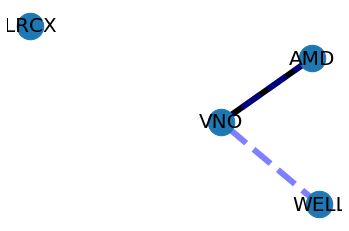

In [45]:
G2 = nx.Graph()

G2.add_edge('WELL', 'AMD', weight=0.13)
G2.add_edge('WELL', 'LRCX', weight=0)
G2.add_edge('WELL', 'VNO', weight=0.44)
G2.add_edge('LRCX', 'AMD', weight=0.03)
G2.add_edge('VNO', 'AMD', weight=0.54)
G2.add_edge('VNO', 'LRCX', weight=0.13)

elarge = [(u, v) for (u, v, d) in G2.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G2.edges(data=True) if d['weight'] >= 0.2] #make dynamic threshold?

pos = nx.spring_layout(G2)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G2, pos, node_size=700)

# edges
nx.draw_networkx_edges(G2, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G2, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G2, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()